# day 335

# Goal: Deploy the model for somebody/something to use

* somebody means other people
* something means other programs, AI or other models to make use of your model to make its life easy.

## example:
* For example, a Tesla car's computer vision system will interact with the car's route planning program (something else) and then the route planning program will get inputs and feedback from the driver (someone else).

![fsfs](https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/09-model-deployment-what-were-doing-demo-trimmed-cropped-small.gif)

![sfsfs](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-what-is-model-deployment-someone-or-something-else.png)

![sfsdf](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-pytorch-workflow-with-deployment.png)

## two criteria to be mindful of when deploying our model:
1. The model should work on a mobile device (this means there will be some compute constraints).
2. The model should make predictions fast (because a slow app is a boring app).

![fsf](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-deployment-questions-to-ask.png)

![sdfsf](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployment-on-device-vs-cloud.png)

## pytorch on raspberry pi:
* For a full example of seeing what it's like to deploy a !PyTorch model to an edge device(https://pytorch.org/tutorials/intermediate/realtime_rpi.html), see the PyTorch tutorial on achieving real-time inference (30fps+) with a computer vision model on a Raspberry Pi.

## online prediction and offline batch predictions:
* **Online (real-time)** - Predicitions/inference happen immediately. For example, someone uploads an image, the image gets transformed and predictions are returned or someone makes a purchase and the transaction is verified to be non-fradulent by a model so the purchase can go through.
* **Offline (batch)** - Predictions/inference happen periodically. For example, a photos application sorts your images into different categories (such as beach, mealtime, family, friends) whilst your mobile device is plugged into charge.


## what is an API?
* Application Programming Interface is term used for when two or more computer programs interact with each other to achieve a task.
* for example, you feed in some bilogical data like recent blood test report, kidney test report, full body MRI and so on to a site in internet that tells you what you need to know to live longer based on your data.It is an API stored in a server in internet. Then you have a Maid Robot that has multiple functionalities it can do many things like cooking house-chores, taking care of elders, tutoring kids and having sex with you when you are tempted and so on, now additionally the robot can interact with that online test report prediction model via internet connection and the robot will become your personal doctor who would monitor every breath and every sweat that comes off your body and tailor personalized treatments that ensure your longevity.

## some tools for on-device or online model deployments:
![sfssd](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-tools-and-places-to-deploy-ml-models.png)

## our goal:
* Performance: 95%+ accuracy.
* Speed: real-time inference of 30FPS+ (each prediction has a latency of lower than ~0.03s).

# PyTorch Model Deployment plan: Blueprint for what's to come.

## 1.Getting setup

We've written a fair bit of useful code over the past few sections. Let's download it and make sure we can use it again.

## 2.Get data

Let's download the pizza_steak_sushi_20_percent.zip dataset so we can train our previously best performing models on the same dataset.

## 3.FoodVision Mini model deployment experiment outline

Even on the third milestone project, we're still going to be running multiple experiments to see which model (EffNetB2 or ViT) achieves closest to our goal metrics.

## 4.Creating an EffNetB2 feature extractor

An EfficientNetB2 feature extractor performed the best on our pizza, steak, sushi dataset in 07. PyTorch Experiment Tracking, let's recreate it as a candidate for deployment.

## 5.Creating a VIT feature extractor

A ViT feature extractor has been the best performing model yet on our pizza, steak, sushi dataset in 08. PyTorch Paper Replicating, let's recreate it as a candidate for deployment alongside EffNetB2.

## 6.Making predictions with our trained models and timing them

We've built two of the best performing models yet, let's make predictions with them and track their results.

## 7.Comparing model results, prediction times and size

Let's compare our models to see which performs best with our goals.

## 8.Bringing FoodVision Mini to life by creating a Gradio demo

One of our models performs better than the other (in terms of our goals), so let's turn it into a working app demo!

## 9.Turning our FoodVision Mini Gradio demo into a deployable app

Our Gradio app demo works locally, let's prepare it for deployment!

## 10.Deploying our Gradio demo to HuggingFace Spaces

Let's take FoodVision Mini to the web and make it pubically accessible for all!

## 11.Creating a BIG surprise

We've built FoodVision Mini, time to step things up a notch.

## 12.Deploying our BIG surprise

Deploying one app was fun, how about we make it two?


# day 336

In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile,os,requests
from PIL import Image
from tqdm.auto import tqdm

# Getting the setup code

In [2]:
!git clone https://github.com/mrdbourke/pytorch-deep-learning
# !mv pytorch-deep-learning/data .
!mv pytorch-deep-learning/going_modular .
!rm -rf pytorch-deep-learning

Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4056, done.
remote: Total 4056 (delta 0), reused 0 (delta 0), pack-reused 4056
Receiving objects: 100% (4056/4056), 646.90 MiB | 24.40 MiB/s, done.
Resolving deltas: 100% (2372/2372), done.
Updating files: 100% (248/248), done.


In [ ]:
!pip install torchinfo

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Getting data

In [ ]:
# unzip the 20% data

image_path = Path('data/images')
image_path.mkdir(parents=True,exist_ok=True)

with zipfile.ZipFile('data/pizza_steak_sushi_20_percent.zip','r') as zip:
  zip.extractall(image_path)
  zip.close()


![sfsf](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-model-deployments-speed-vs-inference.png)

# create an EfficentNetB3 Feature extractor model:
1. functionize the creation of feature extractor model
2. create train and test dataloader with efficientNet transforms
3. train the model with the 20 percent data.
4. plot the accuracy and loss curves of the model.
5. save the model's performance.

In [ ]:
weights = torchvision.models.EfficientNet_B3_Weights.DEFAULT
transforms = torchvision.models.EfficientNet_B3_Weights.DEFAULT.transforms()

model = torchvision.models.efficientnet_b3(weights=weights)

# freeze the layers
for param in model.parameters():
  param.requires_grad = False

model

Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 147MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
            (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [ ]:
def EfficientNet_B3_func(num_classes=3):
  weights = torchvision.models.EfficientNet_B3_Weights.DEFAULT
  transforms = torchvision.models.EfficientNet_B3_Weights.DEFAULT.transforms()

  model = torchvision.models.efficientnet_b3(weights=weights)

  # freeze the layers
  for param in model.parameters():
    param.requires_grad = False

  # modifying the classifier layer of the model to suit the num_classes
  model.classifier = torch.nn.Sequential(
      torch.nn.Dropout(p=0.3,inplace=True),
      torch.nn.Linear(in_features=1536,out_features=num_classes)
  )

  # return the model and its transform
  return model,transforms

In [ ]:
# create dataloaders
from going_modular.going_modular import data_setup

EfficientNet_B3_model,EfficientNet_B3_transform = EfficientNet_B3_func()

train_dir = 'data/images/train'
test_dir = 'data/images/test'

train_dataloader_EfficientNet_B3,test_dataloader_EfficientNet_B3,class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=EfficientNet_B3_transform,
    batch_size=32,
    num_workers=os.cpu_count()
)


In [ ]:
# train the model
optimizer = torch.optim.Adam(params=EfficientNet_B3_model.parameters(),lr=0.001)
loss_fn = torch.nn.CrossEntropyLoss()

# setting the seed
torch.random.manual_seed(42)
torch.cuda.manual_seed(42)

# puttin things in right device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# train the model
from going_modular.going_modular import engine
EfficientNet_B3_results = engine.train(
    model=EfficientNet_B3_model,
    train_dataloader=train_dataloader_EfficientNet_B3,
    test_dataloader=test_dataloader_EfficientNet_B3,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=10,
    device=device

)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9724 | train_acc: 0.5917 | test_loss: 0.7956 | test_acc: 0.9563
Epoch: 2 | train_loss: 0.7176 | train_acc: 0.8708 | test_loss: 0.5981 | test_acc: 0.9318
Epoch: 3 | train_loss: 0.5846 | train_acc: 0.8896 | test_loss: 0.4952 | test_acc: 0.9534
Epoch: 4 | train_loss: 0.4666 | train_acc: 0.8917 | test_loss: 0.4316 | test_acc: 0.9409
Epoch: 5 | train_loss: 0.4383 | train_acc: 0.9000 | test_loss: 0.4055 | test_acc: 0.9324
Epoch: 6 | train_loss: 0.4121 | train_acc: 0.9042 | test_loss: 0.3549 | test_acc: 0.9568
Epoch: 7 | train_loss: 0.4106 | train_acc: 0.8667 | test_loss: 0.3321 | test_acc: 0.9347
Epoch: 8 | train_loss: 0.4074 | train_acc: 0.8542 | test_loss: 0.3343 | test_acc: 0.9631
Epoch: 9 | train_loss: 0.3350 | train_acc: 0.8833 | test_loss: 0.3119 | test_acc: 0.9227
Epoch: 10 | train_loss: 0.3560 | train_acc: 0.8729 | test_loss: 0.2837 | test_acc: 0.9506


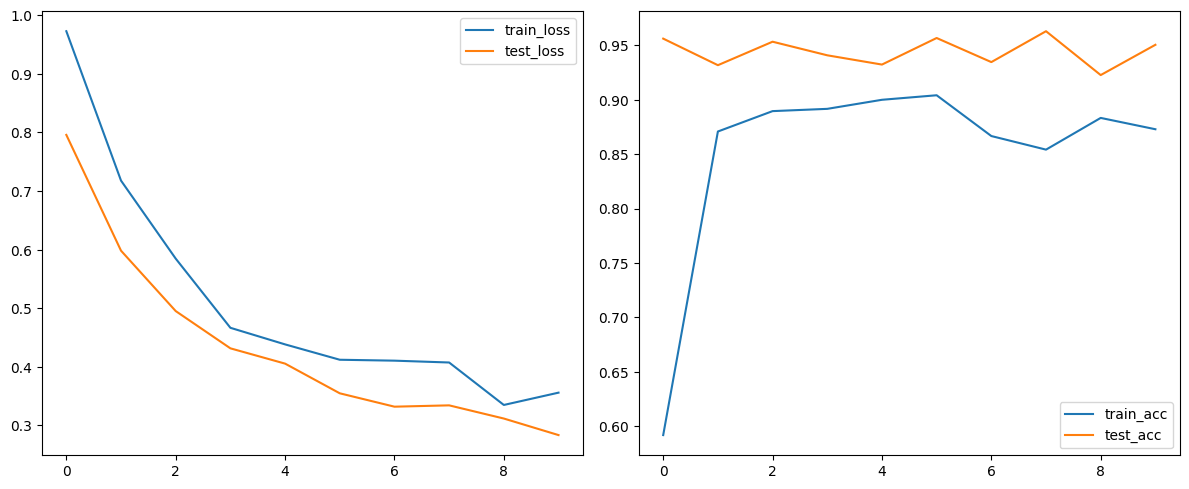

In [ ]:
# plot the loss and accuracy curves
fig,ax = plt.subplots(1,2,figsize=(12,5))

results = EfficientNet_B3_results
ax[0].plot(results['train_loss'],label='train_loss')
ax[0].plot(results['test_loss'],label='test_loss')
ax[0].legend()

ax[1].plot(results['train_acc'],label='train_acc')
ax[1].plot(results['test_acc'],label='test_acc')
ax[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# save the model

def save_model(model,model_name):
  import torch
  target_dir = Path('saved_models')
  target_dir.mkdir(parents=True,exist_ok=True)

  model_saved_path = target_dir / model_name

  print('saving the model')

  torch.save(obj=model.state_dict(),
             f=model_saved_path)




In [ ]:
save_model(model=EfficientNet_B3_model,model_name='EfficientNet_B3_20_percent_data.pth')

saving the model


# checking the size and total elemetns in each parameter of our model

Since one of our criteria for deploying a model to power FoodVision Mini is speed (~30FPS or better), let's check the size of our model.

Why check the size?

Well, while not always the case, the size of a model can influence its inference speed.

As in, if a model has more parameters, it generally performs more operations and each one of these operations requires some computing power.

And because we'd like our model to work on devices with limited computing power (e.g. on a mobile device or in a web browser), generally, the smaller the size the better (as long as it still performs well in terms of accuracy).

In [ ]:
# it gives the values in Bytes and we have to convert it into MegaBytes hence the 1024*1024
EfficientNet_B3_size = Path('saved_models/EfficientNet_B3_20_percent_data.pth').stat().st_size // (1024*1024)

print('Size of EfficientNet_B3 is: {}MB'.format(EfficientNet_B3_size))

Size of EfficientNet_B3 is: 41MB


In [ ]:
# to calculate total number of elements in each parameter of EfficientNet_B3 model
EfficientNet_B3_total_parameters = sum(torch.numel(param) for param in EfficientNet_B3_model.parameters())
EfficientNet_B3_total_parameters

10700843

In [ ]:
# creating a dictionary to have all the stats together for easy comparision later on with other models
EfficientNet_B3_stats = {'test_loss':results['test_loss'][-1],
                         'test_acc':results['test_acc'][-1],
                         'size in MB':EfficientNet_B3_size,
                         'total_parameters':EfficientNet_B3_total_parameters}

EfficientNet_B3_stats

{'test_loss': 0.28365123867988584,
 'test_acc': 0.9505681818181818,
 'size in MB': 41,
 'total_parameters': 10700843}

# creating a ViT model

In [ ]:
weights = torchvision.models.ViT_B_16_Weights.DEFAULT
transform = torchvision.models.ViT_B_16_Weights.DEFAULT.transforms()

model = torchvision.models.vit_b_16(weights=weights)

# freeze the layers
for param in model.parameters():
  param.requires_grad = False

model

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 133MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
# create a function for it
def vit_b_16_model_func(num_classes=3):
  weights = torchvision.models.ViT_B_16_Weights.DEFAULT
  transform = torchvision.models.ViT_B_16_Weights.DEFAULT.transforms()

  model = torchvision.models.vit_b_16(weights=weights)

  # freeze the layers
  for param in model.parameters():
    param.requires_grad = False

  # modify the heads layer
  model.heads = torch.nn.Sequential(
      torch.nn.Linear(in_features=768,out_features=num_classes)
  )

  return model,transform


In [ ]:
# create dataloaders

vit_b_16_model,vit_b_16_transform = vit_b_16_model_func()


from going_modular.going_modular import data_setup
train_dataloader_vit_b_16, test_dataloader_vit_b_16,class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=vit_b_16_transform,
    batch_size=32,
    num_workers=os.cpu_count()

)

In [ ]:
# train the model
optimizer = torch.optim.Adam(params=vit_b_16_model.parameters(),
                             lr=0.001)

loss_fn = torch.nn.CrossEntropyLoss()

# set the seed
torch.random.manual_seed(42)
torch.cuda.manual_seed(42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

from going_modular.going_modular import engine



vit_b_16_results = engine.train(
    model=vit_b_16_model,
    train_dataloader=train_dataloader_vit_b_16,
    test_dataloader=test_dataloader_vit_b_16,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=10,
    device=device


)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5992 | train_acc: 0.8292 | test_loss: 0.2066 | test_acc: 0.9750
Epoch: 2 | train_loss: 0.2354 | train_acc: 0.9250 | test_loss: 0.1282 | test_acc: 0.9875
Epoch: 3 | train_loss: 0.1634 | train_acc: 0.9625 | test_loss: 0.0999 | test_acc: 0.9875
Epoch: 4 | train_loss: 0.1165 | train_acc: 0.9646 | test_loss: 0.0863 | test_acc: 0.9875
Epoch: 5 | train_loss: 0.1055 | train_acc: 0.9688 | test_loss: 0.0766 | test_acc: 0.9812
Epoch: 6 | train_loss: 0.1170 | train_acc: 0.9458 | test_loss: 0.0699 | test_acc: 0.9875
Epoch: 7 | train_loss: 0.0829 | train_acc: 0.9792 | test_loss: 0.0750 | test_acc: 0.9812
Epoch: 8 | train_loss: 0.0856 | train_acc: 0.9875 | test_loss: 0.0648 | test_acc: 0.9875
Epoch: 9 | train_loss: 0.0865 | train_acc: 0.9854 | test_loss: 0.0610 | test_acc: 0.9875
Epoch: 10 | train_loss: 0.0605 | train_acc: 0.9854 | test_loss: 0.0578 | test_acc: 0.9875


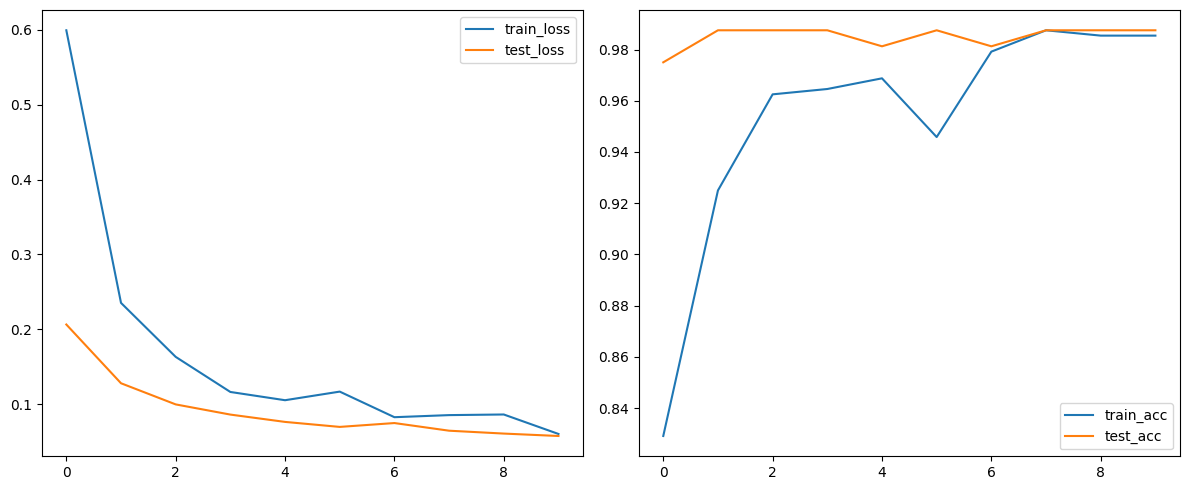

In [ ]:
# plot the results
results = vit_b_16_results

fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(results['train_loss'],label='train_loss')
ax[0].plot(results['test_loss'],label='test_loss')
ax[0].legend()

ax[1].plot(results['train_acc'],label='train_acc')
ax[1].plot(results['test_acc'],label='test_acc')
ax[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# save the model
save_model(model=vit_b_16_model,model_name='vit_b_16_20_percent_data.pth')

saving the model


In [ ]:
# create the stats about the vit model
vit_b_16_size = Path('saved_models/vit_b_16_20_percent_data.pth').stat().st_size // (1024*1024)
vit_b_16_total_parameters = sum(torch.numel(param) for param in vit_b_16_model.parameters())

vit_b_16_stats = {'test_loss':results['test_loss'][-1],
                  'test_acc':results['test_acc'][-1],
                  'size in MB':vit_b_16_size,
                  'total_parameters':vit_b_16_total_parameters}
vit_b_16_stats

{'test_loss': 0.05777871697209776,
 'test_acc': 0.9875,
 'size in MB': 327,
 'total_parameters': 85800963}

# Making predictions with our trained models and timing them

To find out how long each of our models take to performance inference, let's create a function called pred_and_store() to iterate over each of the test dataset images one by one and perform a prediction.

We'll time each of the predictions as well as store the results in a common prediction format: a list of dictionaries (where each element in the list is a single prediction and each sinlge prediction is a dictionary).

Note: We time the predictions one by one rather than by batch because when our model is deployed, it will likely only be making a prediction on one image at a time. As in, someone takes a photo and our model predicts on that single image.

# creating a function to make prediction across test dataset

## things to have pred_dict:
1. path
2. class_name
3. pred_prob
4. pred_class
5. pred_time
6. correct or not

In [ ]:
list(Path(test_dir).glob('*/*.jpg'))[:5]

[PosixPath('data/images/test/pizza/771336.jpg'),
 PosixPath('data/images/test/pizza/3375083.jpg'),
 PosixPath('data/images/test/pizza/2250611.jpg'),
 PosixPath('data/images/test/pizza/419962.jpg'),
 PosixPath('data/images/test/pizza/61656.jpg')]

In [ ]:
import time

In [ ]:
time.perf_counter()

490.239816913

In [ ]:
from pathlib import Path
from PIL import Image
from tqdm.auto import tqdm

def pred_and_store(paths,
                   model,
                   transform,
                   class_names,
                   device):
  pred_list = []

  for path in tqdm(paths):
    pred_dict = {}

    pred_dict['image_path'] = path
    actual_class_name = path.parent.stem
    pred_dict['actual_class_name'] = actual_class_name

    start_time = time.perf_counter()
    img = Image.open(path)
    transformed_image = transform(img).unsqueeze(dim=0).to(device)

    model = model.to(device)

    model.eval()
    with torch.inference_mode():
      pred_logit = model(transformed_image)
      pred_label = torch.argmax(pred_logit,dim=1)
      pred_prob  = torch.max(torch.softmax(pred_logit,dim=1))
      pred_class_name = class_names[pred_label.cpu()]

    end_time = time.perf_counter()
    pred_dict['pred_prob'] = pred_prob.cpu().numpy()
    pred_dict['pred_class_name'] = pred_class_name
    pred_dict['pred_time'] = round(end_time-start_time,4)

    # check if acutal_class_name == pred_class_name
    pred_dict['correct'] = actual_class_name == pred_class_name

    # appending to pred_list
    pred_list.append(pred_dict)

  # outside the loop
  return pred_list

# Making and Timing predictions with EfficientNet_B3_model

In [ ]:
test_image_paths = list(Path(test_dir).glob('*/*.jpg'))
EfficientNet_B3_pred_dicts = pred_and_store(
    paths=test_image_paths,
    model=EfficientNet_B3_model,
    transform=EfficientNet_B3_transform,
    class_names=class_names,
    device=device
)

  0%|          | 0/150 [00:00<?, ?it/s]

In [ ]:
EfficientNet_B3_pred_dicts[:3]

[{'image_path': PosixPath('data/images/test/pizza/771336.jpg'),
  'actual_class_name': 'pizza',
  'pred_prob': array(0.945729, dtype=float32),
  'pred_class_name': 'pizza',
  'pred_time': 0.1723,
  'correct': True},
 {'image_path': PosixPath('data/images/test/pizza/3375083.jpg'),
  'actual_class_name': 'pizza',
  'pred_prob': array(0.90400463, dtype=float32),
  'pred_class_name': 'pizza',
  'pred_time': 0.0328,
  'correct': True},
 {'image_path': PosixPath('data/images/test/pizza/2250611.jpg'),
  'actual_class_name': 'pizza',
  'pred_prob': array(0.9229667, dtype=float32),
  'pred_class_name': 'pizza',
  'pred_time': 0.0278,
  'correct': True}]

In [ ]:
# converting this dictionary dataset into a pandas DataFrame
EfficientNet_B3_pred_df = pd.DataFrame(EfficientNet_B3_pred_dicts)
EfficientNet_B3_pred_df

,image_path,actual_class_name,pred_prob,pred_class_name,pred_time,correct
0,data/images/test/pizza/771336.jpg,pizza,0.945729,pizza,0.1723,True
1,data/images/test/pizza/3375083.jpg,pizza,0.90400463,pizza,0.0328,True
2,data/images/test/pizza/2250611.jpg,pizza,0.9229667,pizza,0.0278,True
3,data/images/test/pizza/419962.jpg,pizza,0.5064001,sushi,0.0266,False
4,data/images/test/pizza/61656.jpg,pizza,0.9368349,pizza,0.0284,True
...,...,...,...,...,...,...
145,data/images/test/sushi/472912.jpg,sushi,0.48460558,steak,0.0272,False
146,data/images/test/sushi/2416569.jpg,sushi,0.9796545,sushi,0.0358,True
147,data/images/test/sushi/511818.jpg,sushi,0.37659064,steak,0.0414,False
148,data/images/test/sushi/46797.jpg,sushi,0.8247959,sushi,0.0457,True


In [ ]:
# check number of correct predictions
EfficientNet_B3_pred_df['correct'].value_counts()

True     143
False      7
Name: correct, dtype: int64

In [ ]:
# average prediction time
np.round(EfficientNet_B3_pred_df['pred_time'].mean(),4)

0.0368

**Note**: Hmm, how does that average prediction time live up to our criteria of our model performing at real-time (~30FPS or 0.03 seconds per prediction)?

* Frames are milliseconds.
* so our model takes little more than 30Frames it takes 37 Frames. so, there is a slight delay.

In [ ]:
# lets add average prediction time to EfficientNet_B3_stats
EfficientNet_B3_stats['average_pred_time'] = np.round(EfficientNet_B3_pred_df['pred_time'].mean(),4)
EfficientNet_B3_stats

{'test_loss': 0.28365123867988584,
 'test_acc': 0.9505681818181818,
 'size in MB': 41,
 'total_parameters': 10700843,
 'average_pred_time': 0.0368}

# Making and Timing predictions with vit_b_16_model

In [ ]:
vit_b_16_pred_dicts = pred_and_store(
    paths=test_image_paths,
    model=vit_b_16_model,
    transform=vit_b_16_transform,
    class_names=class_names,
    device=device
)

vit_b_16_pred_dicts[:3]

  0%|          | 0/150 [00:00<?, ?it/s]

[{'image_path': PosixPath('data/images/test/pizza/771336.jpg'),
  'actual_class_name': 'pizza',
  'pred_prob': array(0.998302, dtype=float32),
  'pred_class_name': 'pizza',
  'pred_time': 0.0425,
  'correct': True},
 {'image_path': PosixPath('data/images/test/pizza/3375083.jpg'),
  'actual_class_name': 'pizza',
  'pred_prob': array(0.99848866, dtype=float32),
  'pred_class_name': 'pizza',
  'pred_time': 0.039,
  'correct': True},
 {'image_path': PosixPath('data/images/test/pizza/2250611.jpg'),
  'actual_class_name': 'pizza',
  'pred_prob': array(0.997743, dtype=float32),
  'pred_class_name': 'pizza',
  'pred_time': 0.033,
  'correct': True}]

In [ ]:
# converting the pred_dicts to pandas
vit_b_16_pred_df = pd.DataFrame(vit_b_16_pred_dicts)
vit_b_16_pred_df

,image_path,actual_class_name,pred_prob,pred_class_name,pred_time,correct
0,data/images/test/pizza/771336.jpg,pizza,0.998302,pizza,0.0425,True
1,data/images/test/pizza/3375083.jpg,pizza,0.99848866,pizza,0.0390,True
2,data/images/test/pizza/2250611.jpg,pizza,0.997743,pizza,0.0330,True
3,data/images/test/pizza/419962.jpg,pizza,0.9989047,pizza,0.0383,True
4,data/images/test/pizza/61656.jpg,pizza,0.98521996,pizza,0.0308,True
...,...,...,...,...,...,...
145,data/images/test/sushi/472912.jpg,sushi,0.91043454,sushi,0.0184,True
146,data/images/test/sushi/2416569.jpg,sushi,0.9953631,sushi,0.0186,True
147,data/images/test/sushi/511818.jpg,sushi,0.9934587,sushi,0.0243,True
148,data/images/test/sushi/46797.jpg,sushi,0.98915184,sushi,0.0183,True


In [ ]:
# number of correct vs wrong
vit_b_16_pred_df['correct'].value_counts()

True     148
False      2
Name: correct, dtype: int64

In [ ]:
# average pred_time
vit_b_16_pred_df['pred_time'].mean()

0.021886666666666665

In [ ]:
# add average pred_time to vit_b_16_stats
vit_b_16_stats['average_pred_time'] = np.round(vit_b_16_pred_df['pred_time'].mean(),4)
vit_b_16_stats

{'test_loss': 0.05777871697209776,
 'test_acc': 0.9875,
 'size in MB': 327,
 'total_parameters': 85800963,
 'average_pred_time': 0.0219}

# comparing both models

In [ ]:
model_performance_stats_df = pd.DataFrame([EfficientNet_B3_stats,vit_b_16_stats])

# adding an extra column
model_performance_stats_df['model'] = ['EfficientNet_B3','vit_b_16']

model_performance_stats_df

,test_loss,test_acc,size in MB,total_parameters,average_pred_time,model
0,0.283651,0.950568,41,10700843,0.0368,EfficientNet_B3
1,0.057779,0.987500,327,85800963,0.0219,vit_b_16


# conclusion:
* Even though our Vit model is comparitively larger than EfficientNet_B3, the average taken to make prediction by the vit model is relatively smaller. It may seem counter-intuitive(since larger model means more time to perform) but it appears to work that way in this case.

# day336

# Deploy the Vit_b16 model in Gradio:

## The reason for choosing vit_b16:
* the reason being is vit_b16 model is both faster and highly accurate compared to EfficientNet_B3 model although its memory footprint is huge (327 MB ).


## what is Gradio?
* Gradio helps to give your machine learning models a web interface so that many people around the globe can use model either directly or as an extensible API.

## Blueprint from instructor Daniel Bourke:
![sf](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/09-gradio-workflow.png)

* inputs -> ML model -> outputs




In [ ]:
!pip install gradio
import gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.3 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 

# Creating a function to map our inputs and outputs

## pseudo code:
* input: image -> transform -> predict with vit_b16 -> output: pred_class, pred prob, time taken

In [ ]:
def predict(img):

  """
  args:
  img: is an image

  returns: prediction class, prediction probability, and time taken to make the prediction

  """

  # transforming the image
  tr_img = vit_b_16_transform(img).unsqueeze(dim=0).to(device)

  # make prediction with vit_b_16
  model = vit_b_16_model.to(device)

  # starting the time
  start_time = time.perf_counter()

  model.eval()
  with torch.inference_mode():
    pred_logit = model(tr_img)
    pred_label = torch.argmax(pred_logit,dim=1).cpu()
    pred_prob = torch.max(torch.softmax(pred_logit,dim=1)).cpu().item()

  # ending the time
  end_time = time.perf_counter()
  # pred_dict = {str(class_names[i]):float(pred_prob[0][i].item()) for i in range(len(class_names))}
  pred_prob  = float(np.round(pred_prob,3))
  pred_class = class_names[pred_label]
  time_taken = float(np.round(end_time-start_time,3))



  return pred_class,pred_prob,time_taken





In [ ]:
image_paths = list(Path(test_dir).glob('*/*.jpg'))
rip = np.random.choice(image_paths,1)[0]
img = Image.open(rip)

predict(img)

('sushi', 0.852, 0.024)

In [ ]:
# random file paths
example_paths = [[str(filepath)] for filepath in np.random.choice(image_paths,3)]
example_paths

[['data/images/test/sushi/2378406.jpg'],
 ['data/images/test/sushi/1844723.jpg'],
 ['data/images/test/sushi/46797.jpg']]

# Building a Gradio Interface

In [ ]:
import gradio as gr

description = 'A machine learning model to classify images into pizza,steak and sushi appropriately'
title = 'Image Classifier'


demo = gr.Interface(fn=predict, # this function maps the inputs to the output
                    inputs=gr.Image(type='pil'), # pillow image
                    outputs=[gr.Label(num_top_classes=1,label='Predictions'),
                             gr.Number(label='prediction probability'),
                             gr.Number(label='prediction time(s)')],
                    examples=example_paths,
                    description=description,
                    title=title
                    )

demo.launch(debug=False, # print errors locally?
            share=True) # share to the public?



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5d8cce009d783bd8ed.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# day 337

# Turning our Foodvision model into a deployable app.
* if we want to share the result with our friends or family to see we can do so by sharing this gradio link but the catch is it would expire within the next 72 hours.
* so, to make our model more permenantly staying in the internet we have to deploy it as an app through Hugging Face Spaces.
* Hugging Face Spaces is a resource that allows you to host and share machine learning apps.
* Building a demo is one of the best ways to showcase and test what you've done.
* And Spaces allows you to do just that.
* You can think of Hugging Face as the GitHub of machine learning.
* If having a good GitHub portfolio showcases your coding abilities, having a good Hugging Face portfolio can showcase your machine learning abilities.
* There are many other places we could upload and host our Gradio app such as, Google Cloud, AWS (Amazon Web Services) or other cloud vendors, however, we're going to use Hugging Face Spaces due to the ease of use and wide adoption by the machine learning community.

# Blueprint for our app creation:

* upload our demo Gradio app, we'll want to put everything relating to it into a single directory.

* For example, our demo might live at the path demos/foodvision_mini/ with the file structure:

```python
"""
demos/
└── foodvision_mini/
    ├── 09_pretrained_vit_b_16_feature_extractor_pizza_steak_sushi_20_percent.pth
    ├── app.py
    ├── examples/
    │   ├── example_1.jpg
    │   ├── example_2.jpg
    │   └── example_3.jpg
    ├── model.py
    └── requirements.txt
"""
```

* app.py contains our Gradio app (similar to the code that launched the app).
* Note: app.py is the default filename used for Hugging Face Spaces, if you deploy your app there, Spaces will by default look for a file called app.py to run. This is changable in settings.
* examples/ contains example images to use with our Gradio app.
* model.py contains the model defintion as well as any transforms assosciated with the model.
* requirements.txt contains the dependencies to run our app such as torch, torchvision and gradio.

# creating a path to store our foodvision mini program

In [ ]:
import shutil
from pathlib import Path

foodvision_mini_path = Path('demos/foodvision_mini')

# if foodvision_min_path is already there then remove any files in it and create a new directory
if foodvision_mini_path.exists():
  shutil.rmtree(foodvision_mini_path)
  foodvision_mini_path.mkdir(parents=True,exist_ok=True)
else:
  foodvision_mini_path.mkdir(parents=True,exist_ok=True)

# check if demos/foodvision_mini has any files stored in?
!ls -ltr demos/foodvision_mini


total 0


# creating a folder of example images to use with our food vision mini

1. Create an /examples directory within the demos/foodvision_mini directory.
2. Choose three random images from the test dataset and collect their filepaths in a list.
3. Copy the three random images from the test dataset to the demos/foodvision_mini/examples/ directory.

In [ ]:
# 1. create an example directrory within the demos/foodvision_mini directory
example_dir = Path('demos/foodvision_mini') / 'examples'
example_dir.mkdir(parents=True,exist_ok=True)

# 2. choose three random images.
test_dir = 'data/images/test'
imagepaths = list(Path(test_dir).glob('*/*.jpg'))
examples = [Path(filepath) for filepath in np.random.choice(imagepaths,3)]


# 3. copy the examples to the example_dir
for example in examples:
  destination = example_dir / example.name
  source = example
  shutil.copy2(src=source,dst=destination)



In [ ]:
# 4. lets make it compatible with Gardio's interface
example_list = [['examples/' + str(filepath)] for filepath in os.listdir(example_dir)]
example_list

[['examples/2250611.jpg'], ['examples/301603.jpg'], ['examples/1346344.jpg']]

### exploration, analysis and freethrows

In [ ]:
examples[0].name

'301603.jpg'

In [ ]:
Path('demos/foodvision_mini') / 'examples'

PosixPath('demos/foodvision_mini/examples')

# Moving our Vit_b_16 model to foodvision_mini_demo directory

In [ ]:
import shutil
source_path = 'saved_models/vit_b_16_20_percent_data.pth'
destination_path = 'demos/foodvision_mini/vit_b_16_20_percent_data.pth'

# try to move it, if it's already been moved then print stating that fact.
try:
  shutil.move(src=source_path,dst=destination_path)
except:
  print("The concerned file has already been moved!!!")


# Turning our vit_b_16 model into a python script(model.py)

In [ ]:
%%writefile demos/foodvision_mini/model.py

import torchvision
import torch
def create_vit_b_16_model(num_classes=3):

  weights = torchvision.models.ViT_B_16_Weights.DEFAULT
  transform = torchvision.models.ViT_B_16_Weights.DEFAULT.transforms()
  model = torchvision.models.vit_b_16(weights=weights)

  # freeze the layers
  for param in model.parameters():
    param.requires_grad = False

  # modify the heads layer
  model.heads = torch.nn.Sequential(
      torch.nn.Linear(in_features=768,out_features=num_classes)
  )

  return model,transform


Writing demos/foodvision_mini/model.py


# Turning our mini Gradio app into a python script(app.py)
* We call it app.py because by default when you create a HuggingFace Space, it looks for a file called app.py to run and host (though you can change this in settings).

## blueprint/pseudo code:
1. import the essentials.
2. create the model and transform
3. load the state dict of your saved model into the model
4. create the predict function
5. create the examples list.
6. create the Gradion interface.


In [ ]:
%%writefile demos/foodvision_mini/app.py

# import the essentials
from demos.foodvision_mini.model import create_vit_b_16_model
import torch
import torchvision
import time
import gradio as gr
import numpy as np
from pathlib import Path

class_names = ['pizza','steak','sushi']
device = 'cuda' if torch.cuda.is_available else 'cpu'

# creating the vit_b_16_model and loading it with state_dict of our trained model
vit_b_16_model,vit_b_16_transform = create_vit_b_16_model(num_classes=3)
vit_b_16_model.load_state_dict(torch.load(f='vit_b_16_20_percent_data.pth'))

# create the predict function
def predict(img):

  """
  args:
  img: is an image

  returns: prediction class, prediction probability, and time taken to make the prediction

  """

  # transforming the image
  tr_img = vit_b_16_transform(img).unsqueeze(dim=0).to(device)

  # make prediction with vit_b_16
  model = vit_b_16_model.to(device)

  # starting the time
  start_time = time.perf_counter()

  model.eval()
  with torch.inference_mode():
    pred_logit = model(tr_img)
    pred_label = torch.argmax(pred_logit,dim=1).cpu()
    pred_prob = torch.max(torch.softmax(pred_logit,dim=1)).cpu().item()

  # ending the time
  end_time = time.perf_counter()
  pred_prob  = float(np.round(pred_prob,3))
  pred_class = class_names[pred_label]
  time_taken = float(np.round(end_time-start_time,3))



  return pred_class,pred_prob,time_taken


# create example list
example_dir = Path('demos/foodvision_mini/examples')
example_list = [['examples/' + str(filepath)] for filepath in os.listdir(example_dir)]

# create Gradio interface
description = 'A machine learning model to classify images into pizza,steak and sushi appropriately'
title = 'Image Classifier'


demo = gr.Interface(fn=predict, # this function maps the inputs to the output
                    inputs=gr.Image(type='pil'), # pillow image
                    outputs=[gr.Label(num_top_classes=1,label='Prediction'),
                             gr.Number(label='prediction probability'),
                             gr.Number(label='prediction time(s)')],
                    examples=example_list,
                    description=description,
                    title=title
                    )

demo.launch(debug=False, # print errors locally?
            share=True) # share to the public?







Overwriting demos/foodvision_mini/app.py


# create a requirement file for foodvision_mini (requirments.txt)

* The last file we need to create for our FoodVision Mini app is a requirements.txt file.

* This will be a text file containing all of the required dependencies for our demo.

* When we deploy our demo app to Hugging Face Spaces, it will search through this file and install the dependencies we define so our app can run.

* The good news is, there's only three!

In [ ]:
torch.__version__

'2.2.1+cu121'

In [ ]:
torchvision.__version__

'0.17.1+cu121'

In [ ]:
gradio.__version__

'4.22.0'

In [ ]:
%%writefile demos/foodvision_mini/requirements.txt
torch==1.12.0
torchvision==0.13.0
gradio==3.1.4

Writing demos/foodvision_mini/requirements.txt


# Deploying our foodvision mini to HuggingFace space.


we got a file names demos but how do we upload it to HuggingFace space?

there are 2 options to do that:
1. uploading via the HuggingFace webinterface(easiest).
2. via terminal or command line.

In [ ]:
!ls -ltr demos/foodvision_mini

total 335244
-rw-r--r-- 1 root root 343266910 Mar 22 13:31 vit_b_16_20_percent_data.pth
drwxr-xr-x 2 root root      4096 Mar 22 13:31 examples
-rw-r--r-- 1 root root       507 Mar 22 13:31 model.py
drwxr-xr-x 2 root root      4096 Mar 22 13:50 __pycache__
-rw-r--r-- 1 root root      2390 Mar 22 14:07 app.py
-rw-r--r-- 1 root root        48 Mar 22 14:27 requirements.txt


# downloading our foodvision mini app files.
* to upload the files to hugging face we need to have it downloaded in compressed form.
* lets zip the files and download them.

`zip -r ../foodvision_mini.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"`

* Where:

* `zip` stands for "zip" as in "please zip together the files in the following directory".
* `-r` stands for "recursive" as in, "go through all of the files in the target directory".
* `../foodvision_mini.zip` is the target directory we'd like our files to be zipped to.
* `*` stands for "all the files in the current directory".
* `-x` stands for "exclude these files".

In [ ]:
# get into demos/foodvision_mini and then zip the files
!cd demos/foodvision_mini && zip -r ../foodvision_mini.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

try:
  from google.colab import files
  files.download("demos/foodvision_mini.zip")

except:
  print("not running in Google Colab")

  adding: app.py (deflated 58%)
  adding: examples/ (stored 0%)
  adding: examples/2250611.jpg (deflated 1%)
  adding: examples/301603.jpg (deflated 14%)
  adding: examples/1346344.jpg (deflated 1%)
  adding: model.py (deflated 48%)
  adding: requirements.txt (deflated 4%)
  adding: vit_b_16_20_percent_data.pth (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# uploading the downloded zip file to Hugging Face

In [ ]:
# IPython is a library to help make Python interactive
from IPython.display import IFrame

# Embed FoodVision Mini Gradio demo
IFrame(src="https://hf.space/embed/mrdbourke/foodvision_mini/+", width=900, height=750)





# day 339,340

# Food vision Big

In [3]:
def create_effnet_b2_model(num_classes=101):
  weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
  transforms = torchvision.models.EfficientNet_B2_Weights.DEFAULT.transforms()
  model = torchvision.models.efficientnet_b2(weights=weights)

  # freeze the layers
  for param in model.parameters():
    param.requires_grad = False

  # modify the classifier layer
  model.classifier = torch.nn.Sequential(
      torch.nn.Dropout(p=0.3),
      torch.nn.Linear(in_features=1408,out_features=num_classes)
  )

  return model,transforms

In [4]:
# creating some training and testing data transforms.

effnetb2_model,model_specific_transform = create_effnet_b2_model()
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.TrivialAugmentWide(),
    model_specific_transform
])
test_transform = model_specific_transform



Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 103MB/s]


# Getting Data for Foodvision Big

In [5]:
data_dir = Path('data')
data_dir.mkdir(parents=True,exist_ok=True)

train_dataset = torchvision.datasets.Food101(root=data_dir,
                                             split='train',
                                             transform=train_transform,
                                             download=True
                                             )

test_dataset = torchvision.datasets.Food101(root=data_dir,
                                            split='test',
                                            transform=test_transform,
                                            download=True)

100%|██████████| 4996278331/4996278331 [02:58<00:00, 27972673.78it/s]


Extracting data/food-101.tar.gz to data


In [21]:
class_names = train_dataset.classes
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

# splitting our dataset into 20% of the total data for faster training


In [6]:
def split_dataset(dataset,size=0.2):
  length1 = int(len(dataset)*size) # 20% of the data
  length2 = int(len(dataset)-length1) # remaining data

  random_split1,random_split2 = torch.utils.data.random_split(dataset=dataset,
                                                              lengths=[length1,length2],
                                                              generator=torch.random.manual_seed(42))
  # returns only 20% of the data.
  return random_split1

In [8]:
train_dataset_20percent = split_dataset(train_dataset,size=0.2)
test_dataset_20percent = split_dataset(test_dataset,size=0.2)

### experiments, analysis and freethrows

In [9]:
# splitting our dataset into 20% of the total data for faster training

size = 0.2
length1 = len(train_dataset) * size # 20% of the total data
length2 = len(train_dataset) - length1 # remaining size

length1,length2

(15150.0, 60600.0)

# creating dataloaders:
num_workers is set to 4 if 4 cpu's are available else it would be 2.

In [10]:
import os

num_workers = 2 if os.cpu_count() <= 4 else 4

train_dataloader_20percent = torch.utils.data.DataLoader(
    train_dataset_20percent,
    batch_size=32,
    shuffle=True,
    num_workers=num_workers
)

test_dataloader_20percent = torch.utils.data.DataLoader(
    test_dataset_20percent,
    batch_size=32,
    shuffle=False,
    num_workers=num_workers
)

# Training FoodVisionBig model

## what is LabelSmoothing?
* label smoothing is distributing the probability of predicitions across all labels by a certain proportion.
* for example:
* without label smoothing: [0,0.99,0,0,0]
* with label smoothing: [0.01,0.95,0.01,0.01,0.01].
* we use label smoothing when we deal with data that have a lot of classes


In [11]:
optimizer = torch.optim.Adam(params=effnetb2_model.parameters())
loss_fn = torch.nn.CrossEntropyLoss(label_smoothing=0.1) # we add the label smoothing because there are too many classes

from going_modular.going_modular import engine
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.random.manual_seed(42)
torch.cuda.manual_seed(42)
effnetb2_model.to(device)

results = engine.train(model=effnetb2_model,
                       train_dataloader=train_dataloader_20percent,
                       test_dataloader=test_dataloader_20percent,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5,
                       device=device
                       )



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.6390 | train_acc: 0.2772 | test_loss: 2.7734 | test_acc: 0.4909
Epoch: 2 | train_loss: 2.8564 | train_acc: 0.4419 | test_loss: 2.4671 | test_acc: 0.5374
Epoch: 3 | train_loss: 2.6557 | train_acc: 0.4807 | test_loss: 2.3582 | test_acc: 0.5574
Epoch: 4 | train_loss: 2.5431 | train_acc: 0.5090 | test_loss: 2.2991 | test_acc: 0.5725
Epoch: 5 | train_loss: 2.4932 | train_acc: 0.5269 | test_loss: 2.2733 | test_acc: 0.5861


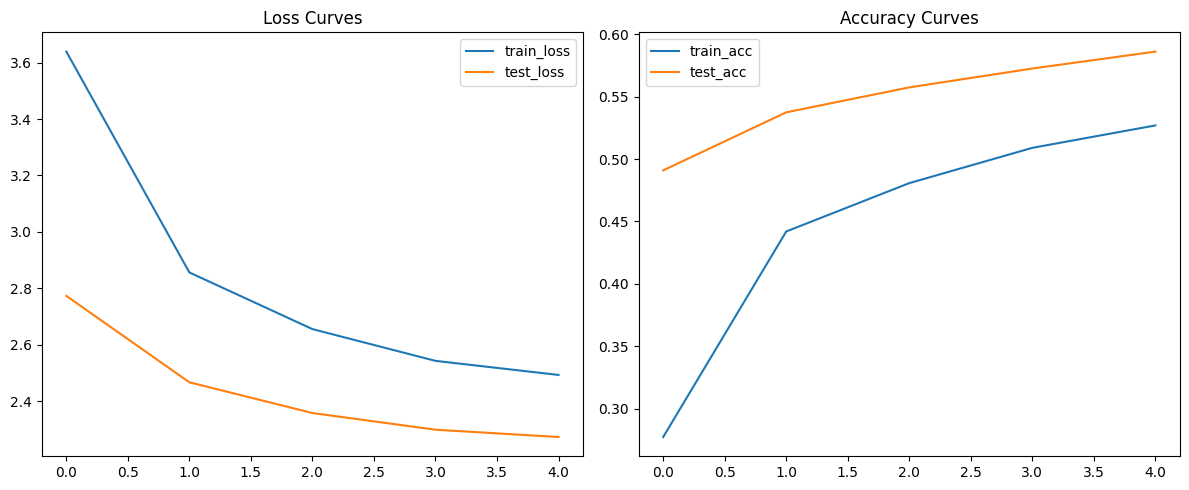

In [12]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(results['train_loss'],label='train_loss')
ax[0].plot(results['test_loss'],label='test_loss')
ax[0].set_title('Loss Curves')
ax[0].legend()

ax[1].plot(results['train_acc'],label='train_acc')
ax[1].plot(results['test_acc'],label='test_acc')
ax[1].set_title('Accuracy Curves')
ax[1].legend()

plt.tight_layout()
plt.show()




In [13]:
# saving and loading the model

def save_model(model,model_name):

  save_dir = Path('saved_models')
  save_dir.mkdir(parents=True,exist_ok=True)

  model_saved_path = save_dir / model_name

  torch.save(obj=model.state_dict(),
            f=model_saved_path)



In [14]:
save_model(effnetb2_model,model_name='effnetb2_20percent_101classes.pth')

In [15]:
# loading the model

## creating the food101 compatible effnetb2 instance
effnetb2_model, effnetb2_transforms = create_effnet_b2_model()

## loading the weights of the saved model into the instantiation
effnetb2_model.load_state_dict(torch.load('saved_models/effnetb2_20percent_101classes.pth'))

<All keys matched successfully>

# checking foodvision Big model size

In [16]:
effnetb2_20percent_101classes_size = Path('saved_models/effnetb2_20percent_101classes.pth').stat().st_size // (1024*1024)

print('Size of our model is: {}MB'.format(effnetb2_20percent_101classes_size))

Size of our model is: 30MB


In [17]:
# finding the total parameters of our model
effnetb2_20percent_101classes_total_parameters = sum(torch.numel(param) for param in effnetb2_model.parameters())
print("Total parameters of our model: {}".format(effnetb2_20percent_101classes_total_parameters))

Total parameters of our model: 7843303


# blueprint for what we are going to do

```python
"""
demos/
  foodvision_big/
    09_pretrained_effnetb2_feature_extractor_food101_20_percent.pth
    app.py
    class_names.txt
    examples/
      example_1.jpg
    model.py
    requirements.txt

```

In [18]:
# creating demos/foodvision_big folder

from pathlib import Path
dir = Path('demos/foodvision_big')
dir.mkdir(parents=True,exist_ok=True)

In [19]:
# creating examples directory to hold example pictures
examples_dir = Path(dir / 'examples')
examples_dir.mkdir(parents=True,exist_ok=True)

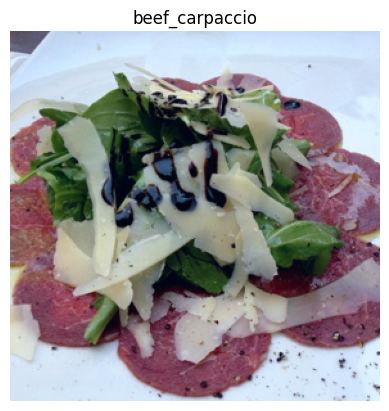

In [22]:
# choosing some images from test_dir and moving them to examples directory
examples = []
n = 3 # number of images

for i in range(n):
  examples.append(test_dataset[np.random.randint(0,len(test_dataset),1)[0]])
img,label = examples[0]

# normalizing(min-max scaling) the image to have values between 0 and 1
img = (img-img.min())/(img.max()-img.min())

# showing the image
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis('off')
plt.show()

In [23]:
# converting image tensor in the examples list into .jpg images

def tensor_to_jpg(examples):
  # converting the tensor into a numpy array
  # permute and min-max scale
  # convert into a pillow image
  # save it with .jpg extension.

  for i in range(len(examples)):
    tensor = examples[i][0]
    np_array = tensor.cpu().numpy()
    np_array = (np_array - np_array.min()) / (np_array.max() - np_array.min()) * 255 # min-max scaling
    np_array = np_array.transpose(1,2,0) # similar to permuting the pytorch tensor
    np_array = np_array.astype(np.uint8)

    # convert numpy array into pillow image
    pil_image = Image.fromarray(np_array)

    # save it as jpeg file
    pil_image.save('example{}.jpg'.format(i+1),format='JPEG')

In [24]:
tensor_to_jpg(examples)

In [25]:
# moving the images to the correct directory where we want it be moved.
!mv example1.jpg demos/foodvision_big/examples
!mv example2.jpg demos/foodvision_big/examples
!mv example3.jpg demos/foodvision_big/examples

In [26]:
# moving the saved model to the correct directory
!mv saved_models/effnetb2_20percent_101classes.pth demos/foodvision_big/

In [27]:
# saving class_names to a file named class_names.txt
class_names_path = Path(dir / 'class_names.txt')


with open('demos/foodvision_big/class_names.txt','w') as f:
  f.write('\n'.join(class_names)) # leave a new line between each class



In [28]:
'\n'.join(class_names[:5])

'apple_pie\nbaby_back_ribs\nbaklava\nbeef_carpaccio\nbeef_tartare'

In [29]:
# reading the class_names.txt
with open('demos/foodvision_big/class_names.txt','r') as f:
  see_it = [class_name.strip('\n') for class_name in f.readlines()] # strip the newline
see_it[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

In [30]:
class_names[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

In [31]:
# lets create model.py
%%writefile demos/foodvision_big/model.py
import torch
import torchvision
def create_effnet_b2_model(num_classes=101):
  """
  Args: num_classes is total number of classes

  returns: model and its corresponding model_specific transform
  """
  weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
  transform = torchvision.models.EfficientNet_B2_Weights.DEFAULT.transforms()
  model = torchvision.models.efficientnet_b2(weights=weights)

  # freeze the parameters from training
  for param in model.parameters():
    param.requires_grad = False

  # modifying the classifier layer
  model.classifier = torch.nn.Sequential(
      torch.nn.Dropout(p=0.3,inplace=True),
      torch.nn.Linear(in_features=1408,out_features=num_classes)
  )

  return model,transform


Writing demos/foodvision_big/model.py


In [33]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.4/312.4 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl s

In [48]:
# lets create the app.py script
%%writefile demos/foodvision_big/app.py
# import the essentials
import torch
import torchvision
import time
import gradio as gr
import numpy as np
from pathlib import Path
from model import create_effnet_b2_model

with open(class_names.txt) as f:
  class_names = [class_name.strip('\n') for class_name in f.readlines()]

device = 'cuda' if torch.cuda.is_available else 'cpu'

# creating the vit_b_16_model and loading it with state_dict of our trained model
effnetb2_model,effnetb2_transform = create_effnet_b2_model(num_classes=len(class_names))
effnetb2_model.load_state_dict(torch.load(f='effnetb2_20percent_101classes.pth'))

# create the predict function
def predict(img):

  """
  args:
  img: is an image

  returns: prediction class, prediction probability, and time taken to make the prediction

  """

  # transforming the image
  tr_img = effnetb2_transform(img).unsqueeze(dim=0).to(device)

  # make prediction with vit_b_16
  model = effnetb2_model.to(device)

  # starting the time
  start_time = time.perf_counter()

  model.eval()
  with torch.inference_mode():
    pred_logit = model(tr_img)
    pred_label = torch.argmax(pred_logit,dim=1).cpu()
    pred_prob = torch.max(torch.softmax(pred_logit,dim=1)).cpu().item()

  # ending the time
  end_time = time.perf_counter()
  pred_prob  = float(np.round(pred_prob,3))
  pred_class = class_names[pred_label]
  time_taken = float(np.round(end_time-start_time,3))



  return pred_class,pred_prob,time_taken


# create example list
example_dir = Path('demos/foodvision_big/examples')
example_list = [['examples/' + str(filepath)] for filepath in os.listdir(example_dir)]

# create Gradio interface
description = 'A machine learning model to classify images into pizza,steak and sushi appropriately'
title = 'Image Classifier'


demo = gr.Interface(fn=predict, # this function maps the inputs to the output
                    inputs=gr.Image(type='pil'), # pillow image
                    outputs=[gr.Label(num_top_classes=1,label='Prediction'),
                             gr.Number(label='prediction probability'),
                             gr.Number(label='prediction time(s)')],
                    examples=example_list,
                    description=description,
                    title=title
                    )

demo.launch()


Overwriting demos/foodvision_big/app.py


In [44]:
example_dir = Path('demos/foodvision_big/examples')
example_list = [['examples/' + str(filepath)] for filepath in os.listdir(example_dir)]
example_list

[['examples/example1.jpg'],
 ['examples/example2.jpg'],
 ['examples/example3.jpg']]

In [41]:
from demos.foodvision_big.model import create_effnet_b2_model

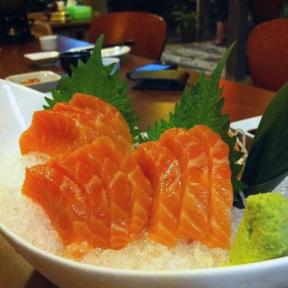

In [47]:
Image.open('demos/foodvision_big/examples/example2.jpg')

# creating a requirement file

In [49]:
%%writefile demos/foodvision_big/requirements.txt
torch==1.12.0
torchvision==0.13.0
gradio==3.1.4

Writing demos/foodvision_big/requirements.txt


# zipping and downloading the files

In [50]:
!cd demos/foodvision_big/ && zip -r ../foodvision_big.zip * -x "*.ipynb" "*.pyc" "*__pycache__*" "*ipynb_checkpoints*"


  adding: app.py (deflated 58%)
  adding: class_names.txt (deflated 48%)
  adding: effnetb2_20percent_101classes.pth (deflated 8%)
  adding: examples/ (stored 0%)
  adding: examples/example1.jpg (deflated 1%)
  adding: examples/example2.jpg (deflated 1%)
  adding: examples/example3.jpg (deflated 1%)
  adding: model.py (deflated 50%)
  adding: requirements.txt (deflated 4%)


In [51]:
try:
  from google.colab import files
  print("downloading the files")
  files.download('demos/foodvision_big.zip')
except:
  print('Files are not in google colab')

downloading the files


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# IPython is a library to help work with Python iteractively
from IPython.display import IFrame

# Embed FoodVision Big Gradio demo as an iFrame
IFrame(src="https://hf.space/embed/mrdbourke/foodvision_big/+", width=900, height=750)